## This Is Our Capstone Project For Code Unnati Internship Under Prof.Praful Vinayak Bhoyar

In [1]:
# Importing all dependencies
import pandas as pd
import numpy as np

In [6]:
data=pd.read_csv("DATA CENTRE GPU'S DATA.csv")

In [8]:
print(data.head())

     gpu_id            timestamp  temperature_c  power_draw_w  fan_speed_rpm  \
0  GPU_0103  2025-07-26 02:54:17      79.645136    285.839214           3129   
1  GPU_0436  2025-07-14 12:03:49      86.003633    231.384458           2313   
2  GPU_0861  2025-07-06 09:58:44      64.945806    361.228629           2464   
3  GPU_0271  2025-07-20 07:22:13      82.152660    317.058037           4296   
4  GPU_0107  2025-07-17 01:04:44      57.282254    186.593502           3053   

   memory_errors  compute_utilization  memory_bandwidth   job_type  \
0              3             7.672633        470.739052  inference   
1              5            95.711243        323.060016  inference   
2              2            82.826731        500.634867   training   
3              2            75.937586        660.616594   training   
4              3            53.449936        505.927588   training   

   job_duration_hrs  gpu_age_days  data_center_temp_c error_code  \
0          2.418682           

In [9]:
print(data.info)

<bound method DataFrame.info of          gpu_id            timestamp  temperature_c  power_draw_w  \
0      GPU_0103  2025-07-26 02:54:17      79.645136    285.839214   
1      GPU_0436  2025-07-14 12:03:49      86.003633    231.384458   
2      GPU_0861  2025-07-06 09:58:44      64.945806    361.228629   
3      GPU_0271  2025-07-20 07:22:13      82.152660    317.058037   
4      GPU_0107  2025-07-17 01:04:44      57.282254    186.593502   
...         ...                  ...            ...           ...   
14995  GPU_0157  2025-07-08 18:48:27      66.859968    291.009018   
14996  GPU_0261  2025-07-17 14:58:01      70.444903    348.713647   
14997  GPU_0077  2025-07-06 15:27:08      68.473882    183.244760   
14998  GPU_0769  2025-07-20 14:59:55      46.623607    267.308206   
14999  GPU_0983  2025-07-22 06:08:44      49.099105    207.705644   

       fan_speed_rpm  memory_errors  compute_utilization  memory_bandwidth  \
0               3129              3             7.672633     

In [10]:
print(data.shape)

(15000, 15)


In [11]:
print(data.describe())

       temperature_c  power_draw_w  fan_speed_rpm  memory_errors  \
count   15000.000000  15000.000000   15000.000000   15000.000000   
mean       64.959006    250.091496    3001.478867       1.999600   
std         9.889725     50.218598     792.653910       1.410626   
min        30.000000    100.000000    1000.000000       0.000000   
25%        58.174612    216.151362    2466.000000       1.000000   
50%        64.910136    250.091830    3001.000000       2.000000   
75%        71.629189    284.189959    3535.250000       3.000000   
max        95.000000    446.925149    5859.000000      10.000000   

       compute_utilization  memory_bandwidth  job_duration_hrs  gpu_age_days  \
count         15000.000000      15000.000000      15000.000000  15000.000000   
mean             49.886251        497.455472         10.129009    921.342267   
std              28.968868        150.108345          9.959190    523.172205   
min               0.024311        100.000000          0.000109     

In [12]:
print(data['failure_label'].value_counts())

failure_label
0    14468
1      532
Name: count, dtype: int64


In [44]:
print("data types of columns::")
print(data.dtypes)

data types of columns::
gpu_id                   object
timestamp                object
temperature_c           float64
power_draw_w            float64
fan_speed_rpm             int64
memory_errors             int64
compute_utilization     float64
memory_bandwidth        float64
job_type                 object
job_duration_hrs        float64
gpu_age_days              int64
data_center_temp_c      float64
error_code               object
failure_label             int64
time_to_failure_days    float64
dtype: object


In [19]:
df=data.drop(columns=['gpu_id','timestamp'])

In [21]:
print(df.shape)

(15000, 13)


In [22]:
print(df.head())

   temperature_c  power_draw_w  fan_speed_rpm  memory_errors  \
0      79.645136    285.839214           3129              3   
1      86.003633    231.384458           2313              5   
2      64.945806    361.228629           2464              2   
3      82.152660    317.058037           4296              2   
4      57.282254    186.593502           3053              3   

   compute_utilization  memory_bandwidth   job_type  job_duration_hrs  \
0             7.672633        470.739052  inference          2.418682   
1            95.711243        323.060016  inference         42.564953   
2            82.826731        500.634867   training          2.616239   
3            75.937586        660.616594   training          4.444150   
4            53.449936        505.927588   training          8.121489   

   gpu_age_days  data_center_temp_c error_code  failure_label  \
0           182           33.980816       NONE              0   
1          1610           24.881761       NONE

In [25]:
df=df.rename(columns={'temperature_c':'gpu_temperature'})

In [26]:
print(df)

       gpu_temperature  power_draw_w  fan_speed_rpm  memory_errors  \
0            79.645136    285.839214           3129              3   
1            86.003633    231.384458           2313              5   
2            64.945806    361.228629           2464              2   
3            82.152660    317.058037           4296              2   
4            57.282254    186.593502           3053              3   
...                ...           ...            ...            ...   
14995        66.859968    291.009018           2936              1   
14996        70.444903    348.713647           3570              1   
14997        68.473882    183.244760           2651              1   
14998        46.623607    267.308206           2837              2   
14999        49.099105    207.705644           3133              1   

       compute_utilization  memory_bandwidth   job_type  job_duration_hrs  \
0                 7.672633        470.739052  inference          2.418682   
1    

In [36]:
print(df.isnull().sum())

gpu_temperature         0
power_draw_w            0
fan_speed_rpm           0
memory_errors           0
compute_utilization     0
memory_bandwidth        0
job_type                0
job_duration_hrs        0
gpu_age_days            0
data_center_temp_c      0
error_code              0
failure_label           0
time_to_failure_days    0
dtype: int64


In [47]:
statics_summary=df.describe()
display(statics_summary)

,gpu_temperature,power_draw_w,fan_speed_rpm,memory_errors,compute_utilization,memory_bandwidth,job_duration_hrs,gpu_age_days,data_center_temp_c,failure_label,time_to_failure_days
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,64.959006,250.091496,3001.478867,1.999600,49.886251,497.455472,10.129009,921.342267,27.024400,0.035467,9.668915
std,9.889725,50.218598,792.653910,1.410626,28.968868,150.108345,9.959190,523.172205,2.929435,0.184962,8.456705
min,30.000000,100.000000,1000.000000,0.000000,0.024311,100.000000,0.000109,0.000000,20.000000,0.000000,0.000056
25%,58.174612,216.151362,2466.000000,1.000000,24.573635,395.158263,2.968330,471.000000,25.025621,0.000000,2.914735
50%,64.910136,250.091830,3001.000000,2.000000,49.897184,497.683942,7.135005,922.000000,27.017362,0.000000,7.068773
75%,71.629189,284.189959,3535.250000,3.000000,75.014585,597.867623,14.121245,1372.000000,28.951447,0.000000,14.088080
max,95.000000,446.925149,5859.000000,10.000000,99.980578,1000.000000,100.000000,1825.000000,39.894835,1.000000,30.000000


## Now outlier Treatment 

In [54]:
num_cols= ['gpu_temperature','power_draw_w','fan_speed_rpm','memory_errors','compute_utilization','memory_bandwidth','job_duration_hrs','gpu_age_days','data_center_temp_c']

In [55]:
print(num_cols)

['gpu_temperature', 'power_draw_w', 'fan_speed_rpm', 'memory_errors', 'compute_utilization', 'memory_bandwidth', 'job_duration_hrs', 'gpu_age_days', 'data_center_temp_c']


In [63]:
for col in num_cols:
    Q1= df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    IQR= Q3-Q1
    lower_bound= Q1 - 1.5 * IQR 
    upper_bound= Q3 + 1.5 * IQR
    mean_value = df[col].mean()
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    print(f"outliers in {col}:{outliers.sum()} repalced with mean {mean_value:.2f}")
    df.loc[outliers,col] = mean_value

print("numerical column ranges after outlier treatment:")
display(df[num_cols].describe())

outliers in gpu_temperature:0 repalced with mean 64.94
outliers in power_draw_w:0 repalced with mean 250.03
outliers in fan_speed_rpm:0 repalced with mean 2991.14
outliers in memory_errors:0 repalced with mean 1.98
outliers in compute_utilization:0 repalced with mean 49.89
outliers in memory_bandwidth:0 repalced with mean 495.60
outliers in job_duration_hrs:141 repalced with mean 8.05
outliers in gpu_age_days:0 repalced with mean 921.34
outliers in data_center_temp_c:0 repalced with mean 26.98
numerical column ranges after outlier treatment:


,gpu_temperature,power_draw_w,fan_speed_rpm,memory_errors,compute_utilization,memory_bandwidth,job_duration_hrs,gpu_age_days,data_center_temp_c
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,64.942778,250.028781,2991.140133,1.977532,49.886251,495.600515,7.895897,921.342267,26.980368
std,9.577489,48.437856,776.760612,1.368145,28.968868,147.331584,5.861726,523.172205,2.860143
min,38.352643,116.773036,1000.000000,0.000000,0.024311,100.000000,0.000109,0.000000,20.000000
25%,58.269767,216.859351,2466.000000,1.000000,24.573635,395.158263,2.968330,471.000000,25.025621
50%,64.959006,250.091496,3001.000000,2.000000,49.897184,497.455472,7.135005,922.000000,27.013016
75%,71.550585,283.593971,3526.000000,3.000000,75.014585,595.535223,11.086468,1372.000000,28.914416
max,91.464634,383.548016,5113.000000,6.000000,99.980578,895.898060,23.969762,1825.000000,34.744003


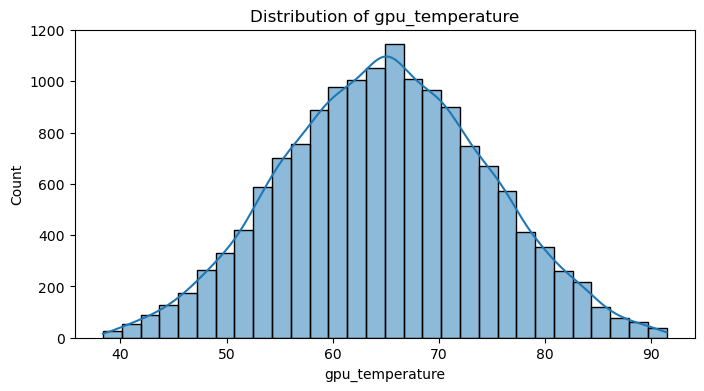

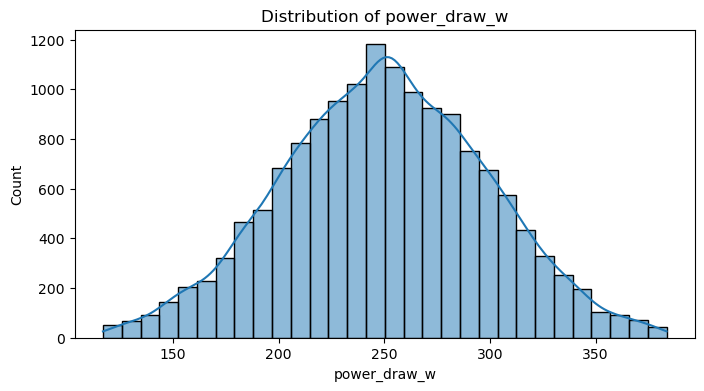

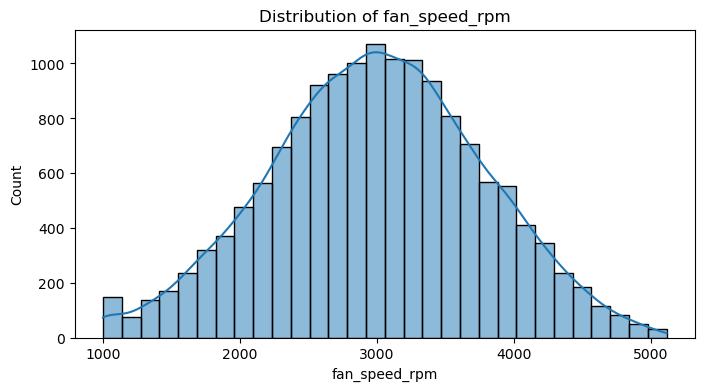

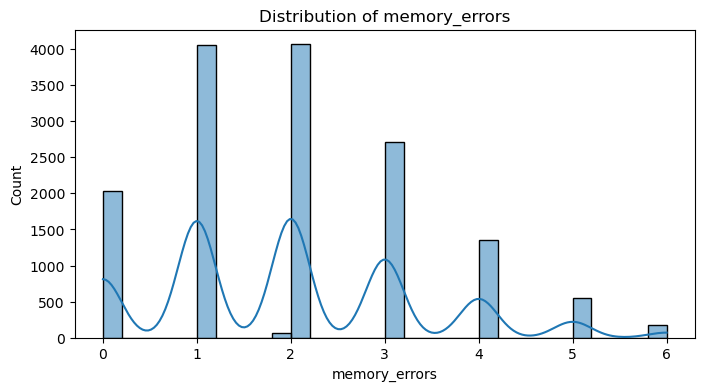

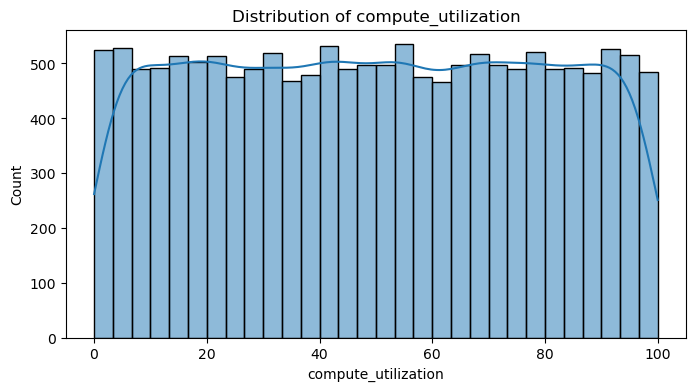

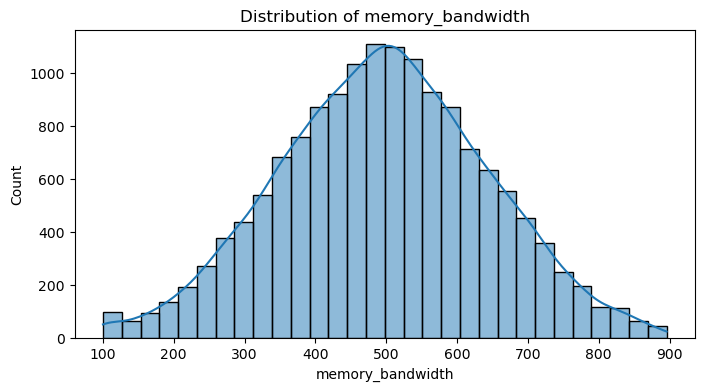

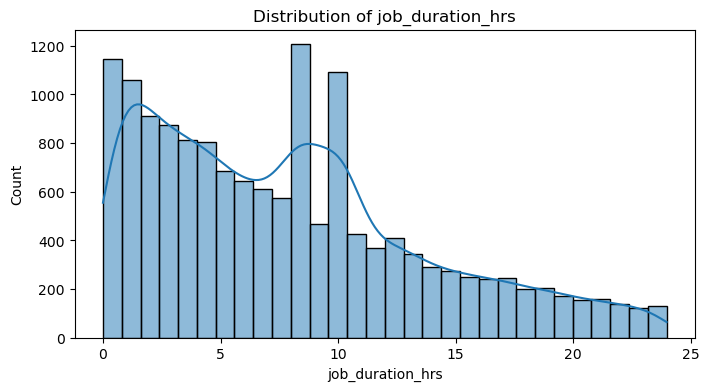

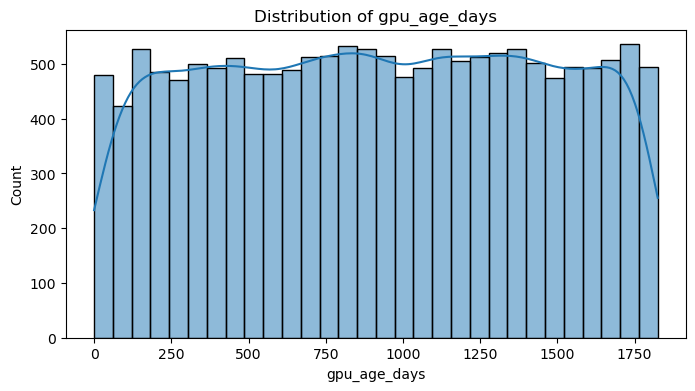

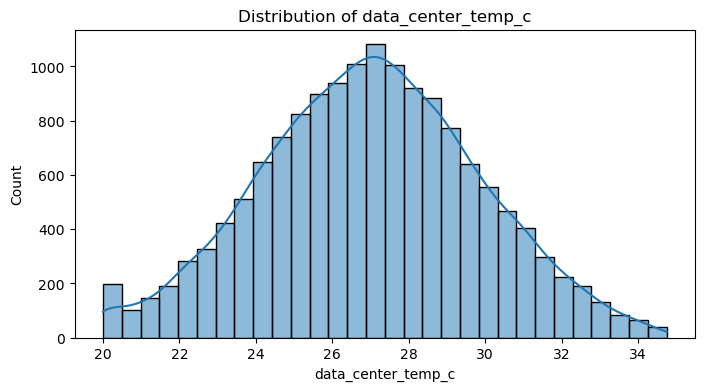

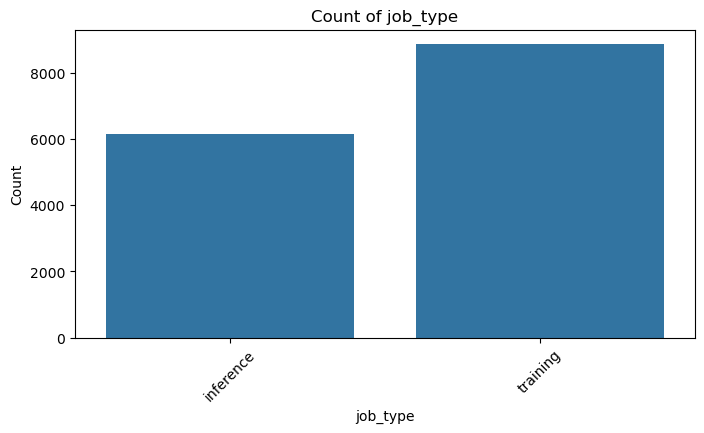

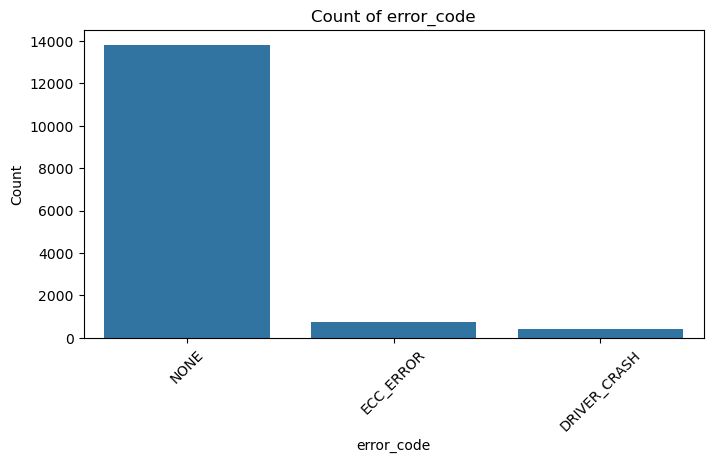

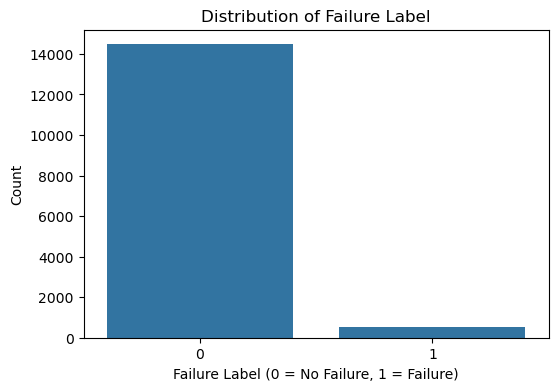

In [68]:
## UNIVARIATE ANALYSIS

import matplotlib.pyplot as plt
import seaborn as sns


# Numerical columns: Histograms
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Categorical columns: Count plots
cat_cols = ['job_type', 'error_code']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Target variable: Failure Label
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='failure_label')
plt.title('Distribution of Failure Label')
plt.xlabel('Failure Label (0 = No Failure, 1 = Failure)')
plt.ylabel('Count')
plt.show()



Histograms: Show distributions of numerical features like temperature_c (likely centered around 50–70°C), power_draw_w (200–300W), etc.

Count Plots: Show job_type (e.g., balanced between "training" and "inference") and error_code (likely dominated by("NONE").

Failure Label: Bar plot showing ~96.45% for 0 and ~3.55% for 1, highlighting the imbalance.

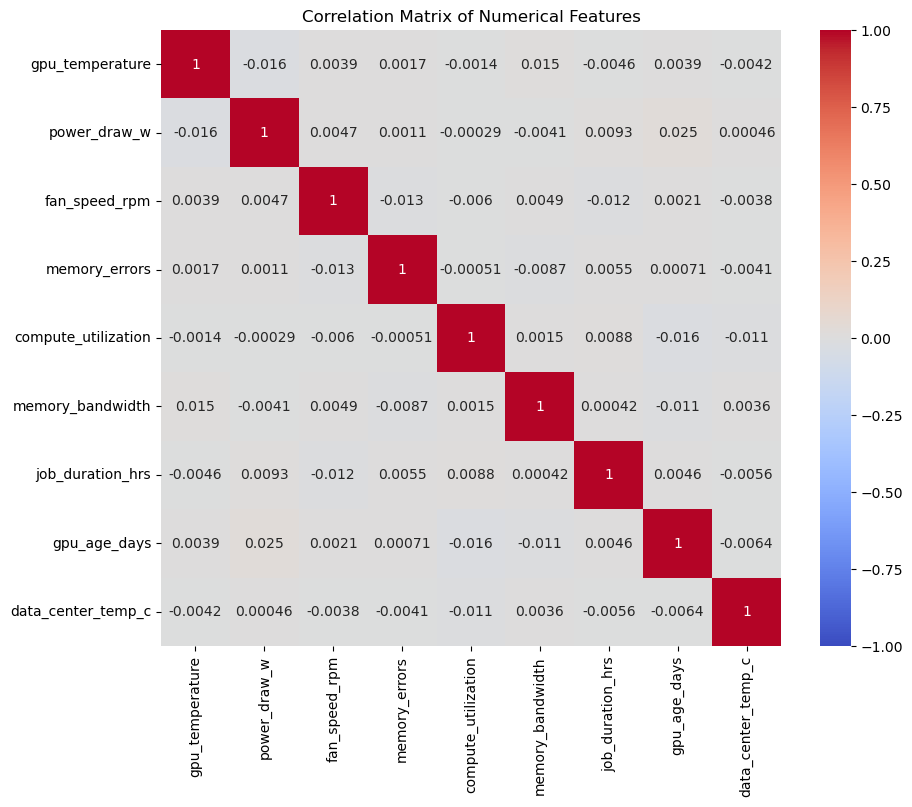

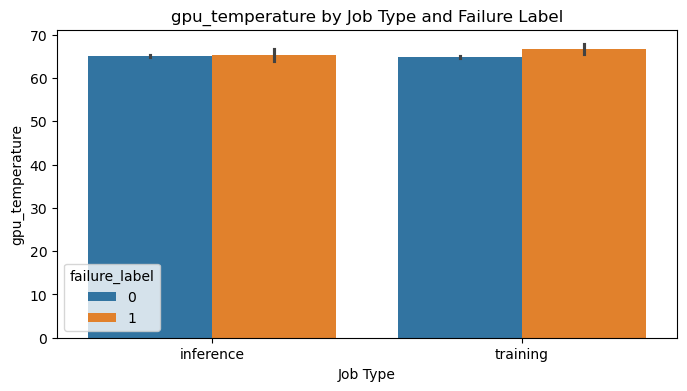

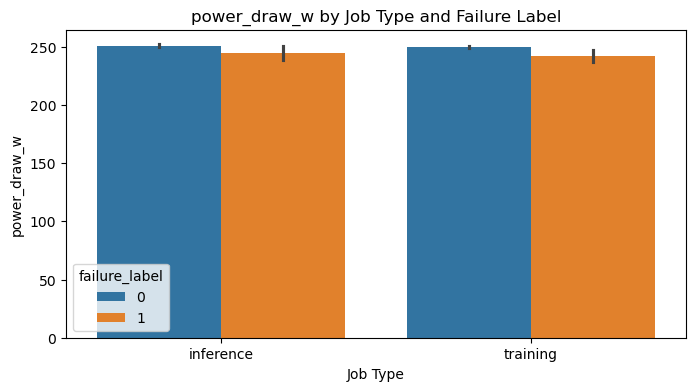

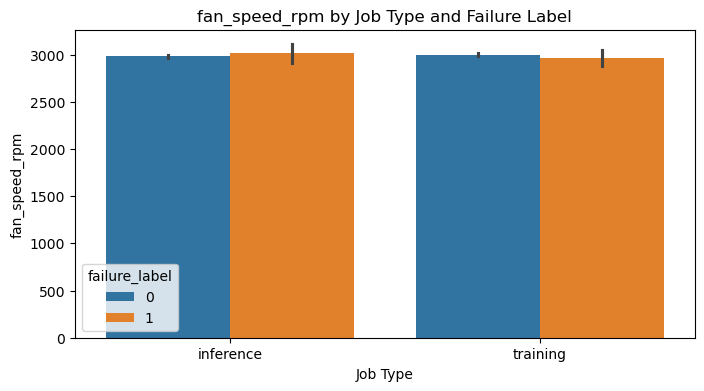

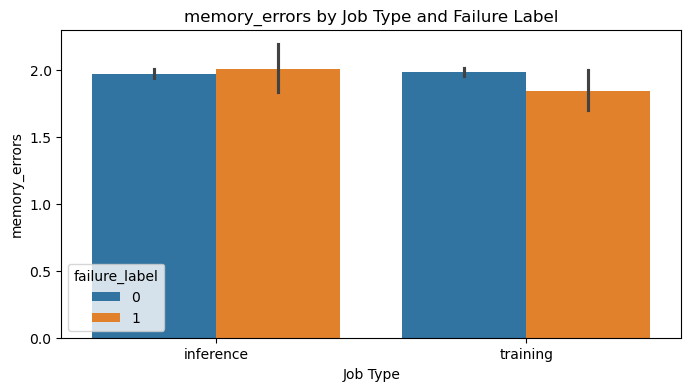

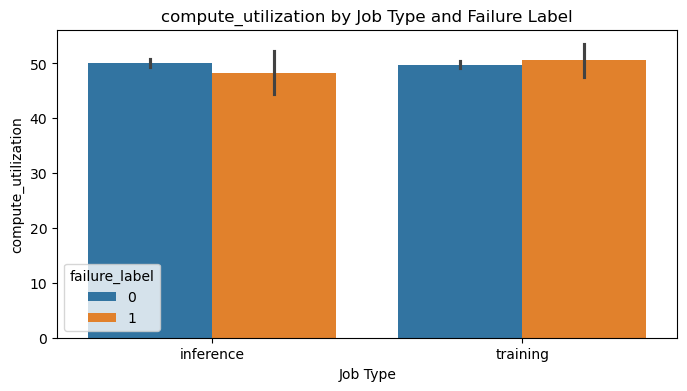

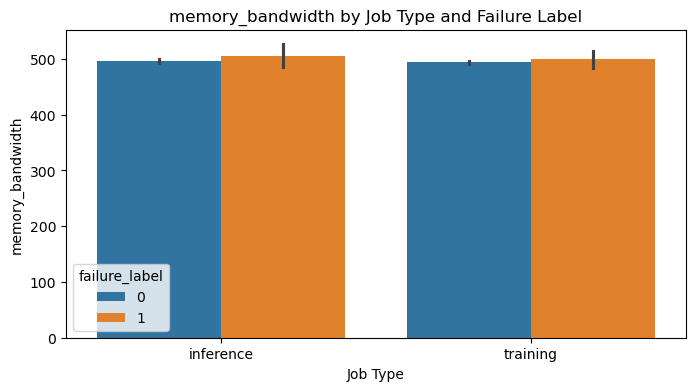

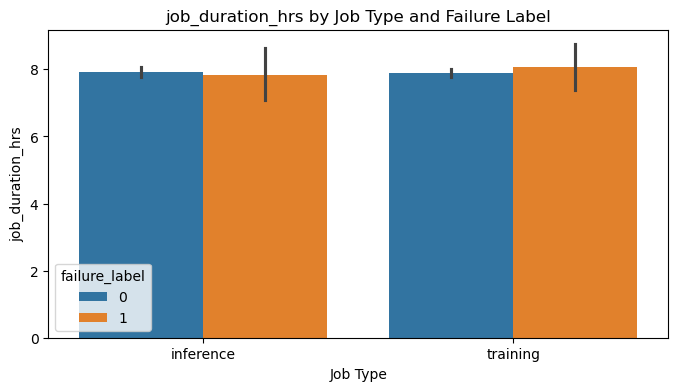

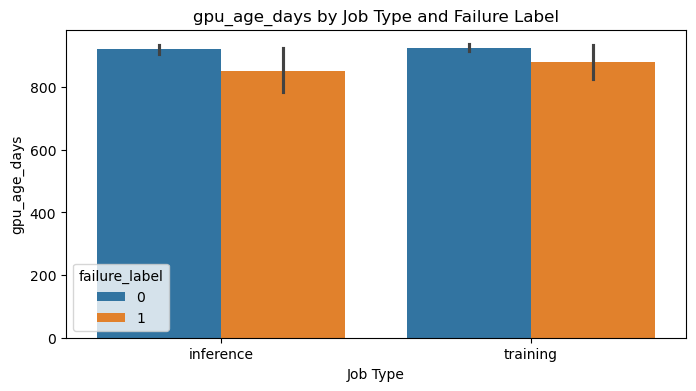

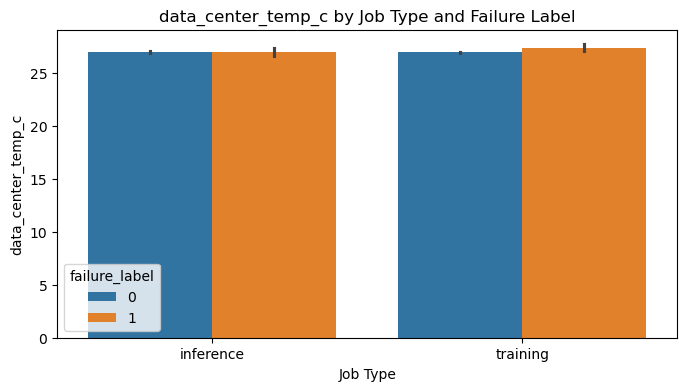

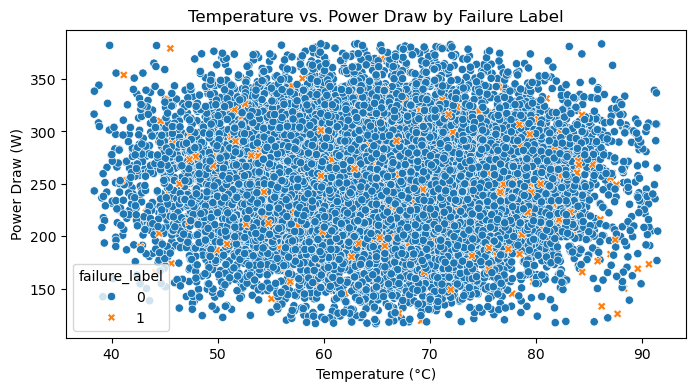

Cross-Tab: Job Type vs. Error Code
error_code  DRIVER_CRASH  ECC_ERROR  NONE
job_type                                 
inference            180        292  5675
training             253        456  8144


In [70]:
## BIVARIATE ANALYSIS
# Correlation Matrix for Numerical Columns
plt.figure(figsize=(10, 8))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Categorical-Numerical: Bar plot (e.g., job_type vs. temperature_c)
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=df, x='job_type', y=col, hue='failure_label')
    plt.title(f'{col} by Job Type and Failure Label')
    plt.xlabel('Job Type')
    plt.ylabel(col)
    plt.show()

# Numerical-Numerical: Scatter plot (example: temperature_c vs. power_draw_w)
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='gpu_temperature', y='power_draw_w', hue='failure_label', style='failure_label')
plt.title('Temperature vs. Power Draw by Failure Label')
plt.xlabel('Temperature (°C)')
plt.ylabel('Power Draw (W)')
plt.show()

# Categorical-Categorical: Cross-tab for job_type and error_code
print("Cross-Tab: Job Type vs. Error Code")
print(pd.crosstab(df['job_type'], df['error_code']))

Correlation Matrix: Likely shows strong positive correlations between temperature_c, power_draw_w, and compute_utilization (high workload increases heat and power).

Bar Plots: gpu_temperature might be higher for job_type = training and failure_label = 1.

Scatter Plot: Failures (failure_label = 1) may cluster at higher temperature_c and power_draw_w.

Cross-Tab: Shows if certain error_code values (e.g., "ECC_ERR") are more common with job_type = training.

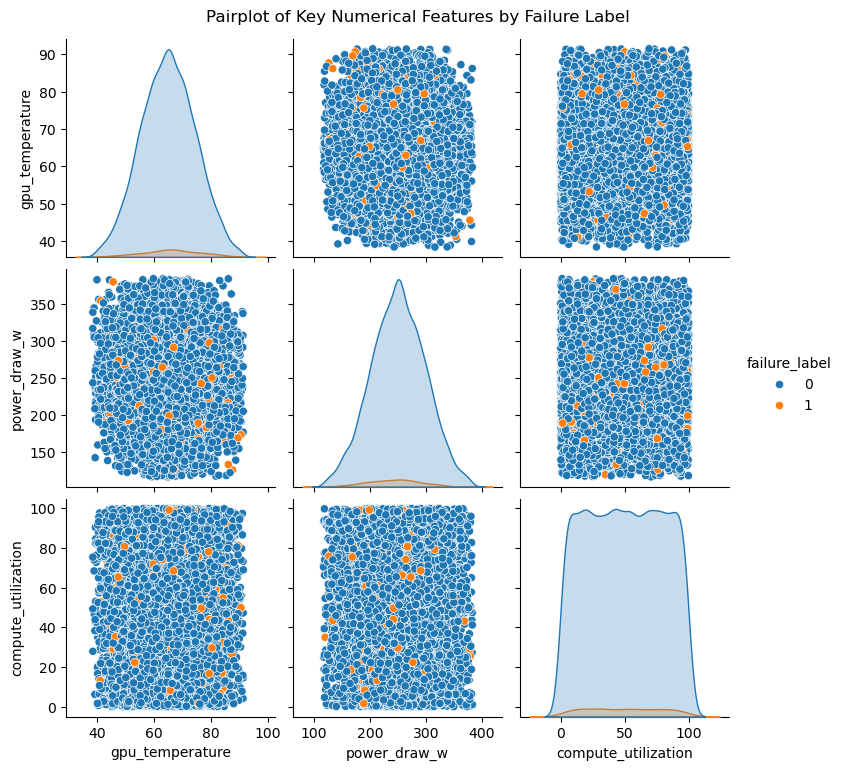

Pivot Table: Mean Temperature by Job Type and Error Code
error_code  DRIVER_CRASH  ECC_ERROR       NONE
job_type                                      
inference      64.927904  64.811194  64.967806
training       64.986549  64.772247  64.938573


<Figure size 800x400 with 0 Axes>

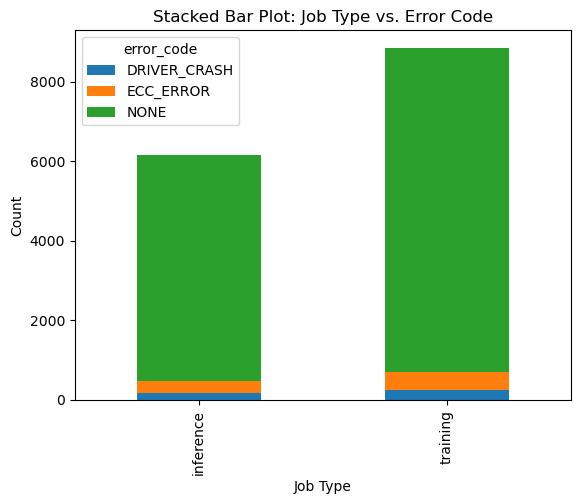

In [71]:
## MULTIVARIATE ANALYSIS

# Numerical-Numerical-Categorical: Pairplot
sns.pairplot(df, vars=['gpu_temperature', 'power_draw_w', 'compute_utilization'], 
             hue='failure_label', diag_kind='kde')
plt.suptitle('Pairplot of Key Numerical Features by Failure Label', y=1.02)
plt.show()

# Categorical-Categorical-Numerical: Pivot Table
pivot = df.pivot_table(values='gpu_temperature', index='job_type', 
                       columns='error_code', aggfunc='mean')
print("Pivot Table: Mean Temperature by Job Type and Error Code")
print(pivot)

# Categorical-Categorical-Categorical: Stacked Bar Plot
plt.figure(figsize=(8, 4))
pd.crosstab(df['job_type'], df['error_code']).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot: Job Type vs. Error Code')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.show()

Pairplot: Shows pairwise relationships (e.g., gpu_temperature vs. power_draw_w) with failure_label as hue, highlighting failure clusters.

Pivot Table: Mean gpu_temperature might be higher for error_code = ECC_ERR and job_type = training.

Stacked Bar Plot: Visualizes if error_code frequencies differ by job_type.

In [74]:
#: Make Data Ready for ML

df_encoded=pd.get_dummies(df,columns=['job_type','error_code'],drop_first=True)



In [77]:
print('columns after encoding:')
print(df_encoded.columns)

columns after encoding:
Index(['gpu_temperature', 'power_draw_w', 'fan_speed_rpm', 'memory_errors',
       'compute_utilization', 'memory_bandwidth', 'job_duration_hrs',
       'gpu_age_days', 'data_center_temp_c', 'failure_label',
       'time_to_failure_days', 'job_type_training', 'error_code_ECC_ERROR',
       'error_code_NONE'],
      dtype='object')


In [81]:
# perform scaling on data for Normalizing the values
from sklearn.preprocessing import StandardScaler
num_cols= ['gpu_temperature','power_draw_w','fan_speed_rpm','memory_errors','compute_utilization','memory_bandwidth','job_duration_hrs','gpu_age_days','data_center_temp_c']
scaler = StandardScaler()
df_encoded[num_cols]= scaler.fit_transform(df_encoded[num_cols])

print("scaled numerical columns:")
display(df_encoded[num_cols].describe())

scaled numerical columns:


,gpu_temperature,power_draw_w,fan_speed_rpm,memory_errors,compute_utilization,memory_bandwidth,job_duration_hrs,gpu_age_days,data_center_temp_c
count,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04
mean,-8.289665e-18,9.473903e-18,-1.042129e-17,-1.847411e-17,5.447494e-18,-9.592327e-18,-1.942150e-17,9.473903e-18,-4.263256e-18
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.776408e+00,-2.751158e+00,-2.563475e+00,-1.445459e+00,-1.721282e+00,-2.685193e+00,-1.347052e+00,-1.761128e+00,-2.440647e+00
25%,-6.967623e-01,-6.848060e-01,-6.760869e-01,-7.145182e-01,-8.738160e-01,-6.817656e-01,-8.406622e-01,-8.608203e-01,-6.834667e-01
50%,1.694439e-03,1.294789e-03,1.269400e-02,1.642304e-02,3.774096e-04,1.259077e-02,-1.298111e-01,1.257244e-03,1.141521e-02
75%,6.899541e-01,6.929768e-01,6.886004e-01,7.473642e-01,8.674544e-01,6.783205e-01,5.443240e-01,8.614234e-01,6.762294e-01
max,2.769279e+00,2.756598e+00,2.731769e+00,2.940188e+00,1.729305e+00,2.717075e+00,2.742264e+00,1.727324e+00,2.714512e+00


In [83]:
##Split Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

## split features and target

X = df_encoded.drop(columns=['failure_label'])
y = df_encoded['failure_label']

## Train-test split with stratification
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
print("Training set shape:",X_train.shape,y_train.shape)
print("Testing set  shape:",X_test.shape,y_test.shape)
print("failure label distribution in training set:")
print(y_train.value_counts(normalize=True))


Training set shape: (12000, 13) (12000,)
Testing set  shape: (3000, 13) (3000,)
failure label distribution in training set:
failure_label
0    0.9645
1    0.0355
Name: proportion, dtype: float64


scale_pos_weight: 27.17
classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2894
           1       0.03      0.01      0.01       106

    accuracy                           0.95      3000
   macro avg       0.50      0.50      0.49      3000
weighted avg       0.93      0.95      0.94      3000

ROC AUC SCORE: 0.5369600083451773


<Figure size 1000x600 with 0 Axes>

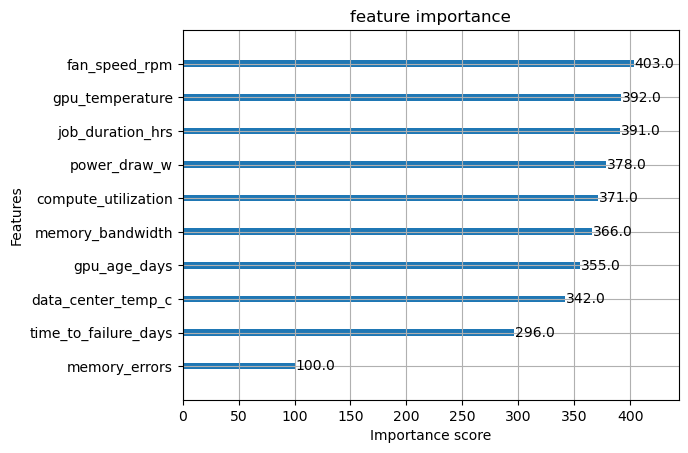

In [97]:
## Find The Base Model
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,roc_auc_score
from collections import Counter

# calculate the scale pos wieght for handling the imbalances
counts = Counter(y_train)
scale_pos_weight = counts[0] / counts[1]
print(f"scale_pos_weight: {scale_pos_weight:.2f}")


model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("classification Report:")
print(classification_report(y_test,y_pred))
print("Base Model ROC AUC SCORE:",roc_auc_score(y_test,y_prob))

from xgboost import plot_importance
plt.figure(figsize=(10,6))
plot_importance(model,max_num_features=10)
plt.title("feature importance")
plt.show()



In [100]:
##Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200]
}
grid_search = GridSearchCV(
    estimator=XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss', 
                            use_label_encoder=False, random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

C:\Users\mppat\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:47:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='f1')

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.63      0.76      2894
           1       0.04      0.40      0.07       106

    accuracy                           0.62      3000
   macro avg       0.50      0.51      0.42      3000
weighted avg       0.93      0.62      0.74      3000

Tuned Model ROC AUC Score: 0.5375125503644496


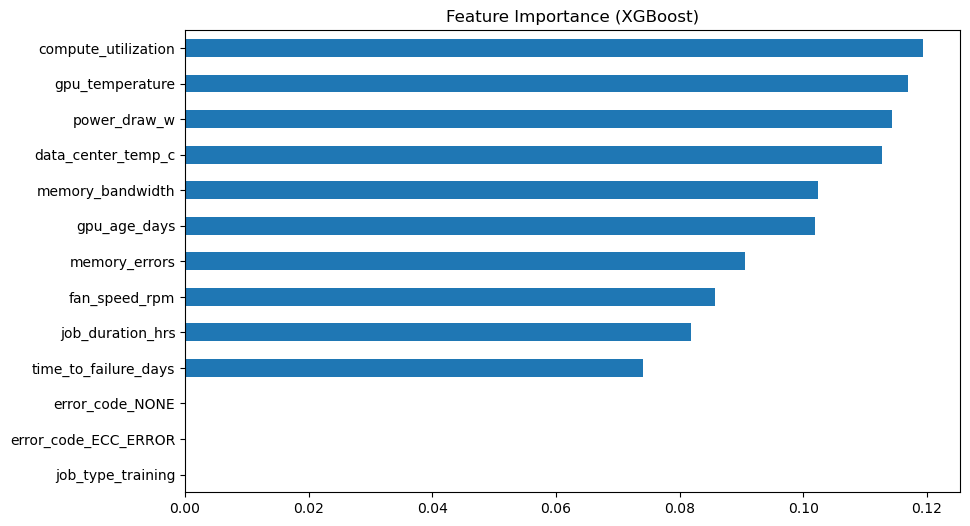

In [101]:
## Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]
print("Tuned Model Classification Report:")
print(classification_report(y_test, y_pred_best))
print("Tuned Model ROC AUC Score:", roc_auc_score(y_test, y_proba_best))

# Feature importance plot
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance (XGBoost)')
plt.show()